<p style="text-align:center;"><img src="https://raw.githubusercontent.com/AlirezaHanifi/Movies-Frame-by-Frame/master/Clint%20Eastwood.jpg" width="450"></p>

**Clint Eastwood** celebrated his 92nd birthday recently. In honor of his birthday, I dedicated this notebook to him.

# Import Libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Reading the Movies

A folder called Movies contains all the movies I want. A frame from a movie every "Nsec" seconds should be saved in the Frame directory and in the same folder as the movie itself. To create a movie palette, I put all the frames of the movie together. 
<br></br>
It is not a bad idea to refer to my current directory for clarity!

<p style="text-align:center;"><img src="https://raw.githubusercontent.com/AlirezaHanifi/Movies-Frame-by-Frame/master/tree.jpg" width="250"></p>

In [4]:
vid_num = 0 # number of videos in ./Movie directory.
vid_name_list = [] # list of videos in ./Movie directory.
images_path = {} # a dictionary that contains frames for each movie. 

for video in os.listdir("./Movies"):
    
    vid_num += 1
    vid_path = os.path.join("./Movies", video)
    vid_name = (re.split(r'\.mp4|.mkv', video))[0]
    vid_name_list.append(vid_name)
    
    vidcap = cv2.VideoCapture(os.path.join("./Movies", video)) #(720, 1280)
    fps = int(vidcap.get(cv2.CAP_PROP_FPS))

    frames_path = "./Frames/" + str(vid_name)

    try:
        if not os.path.exists(frames_path):
            os.makedirs(frames_path)
    except OSError:
        print('Error: Creating directory of frames')

    count = 0
    Nsec = 30 # a frame from a movie every Nsec seconds saved.
    images_path[vid_name_list[vid_num -1]] = []

    while (True):

        success, frame = vidcap.read()

        if success:
            if count % (fps * Nsec) == 0:
                path_name = frames_path + '/frame' + str(count) + '.jpg'
                images_path[vid_name_list[vid_num -1]].append(path_name)
                #print('Creating:' + path_name)
                cv2.imwrite(path_name, frame)

            count += 1
        else:
            break

vidcap.release()
cv2.destroyAllWindows()

# plotting

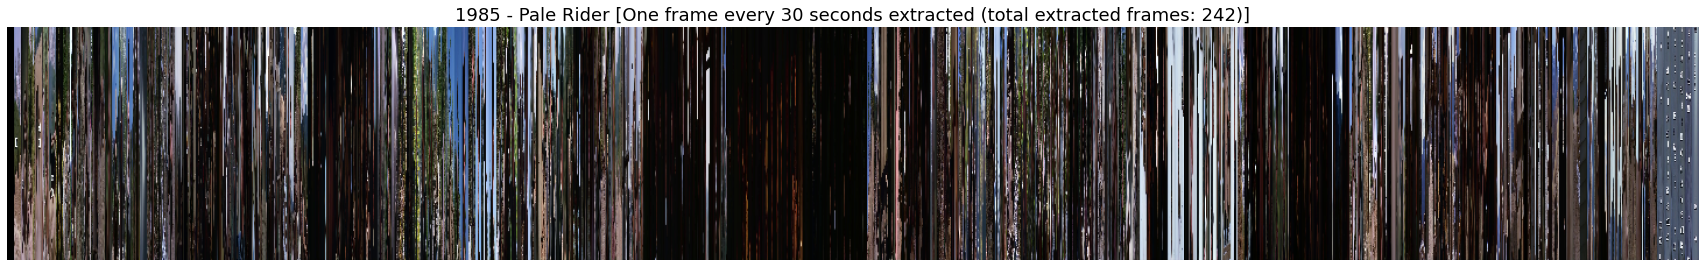

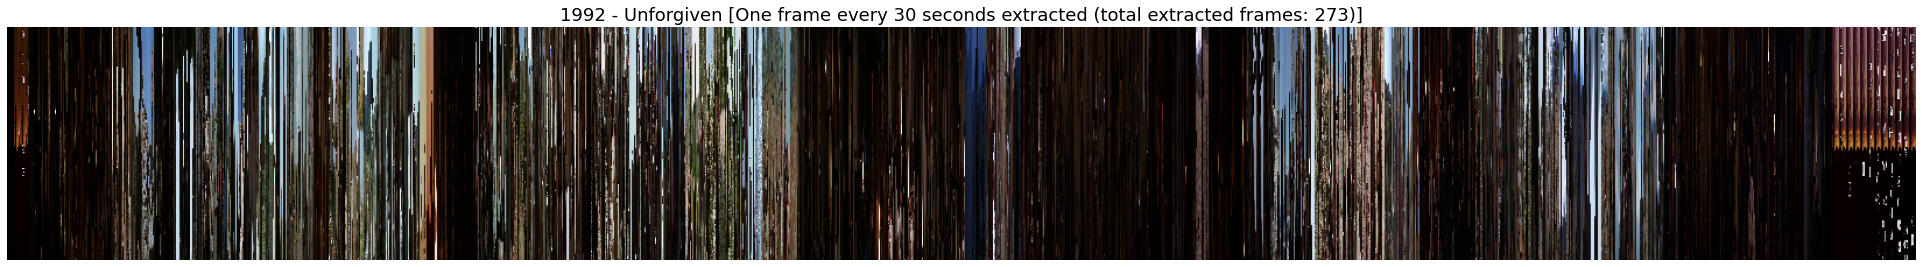

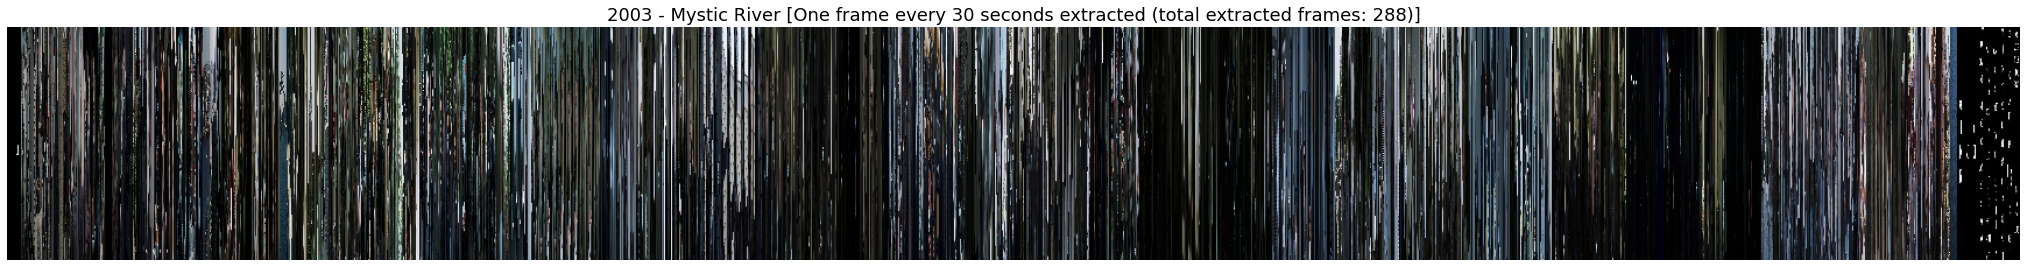

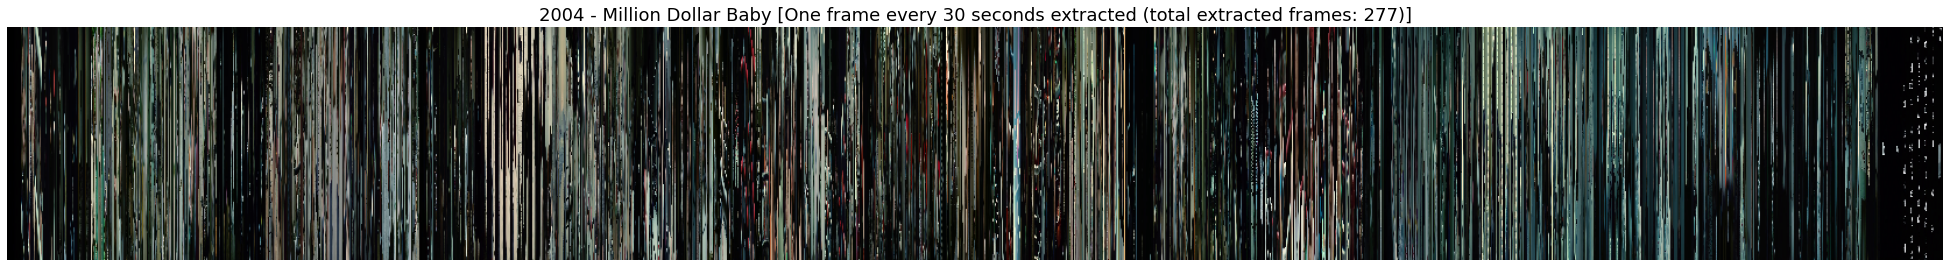

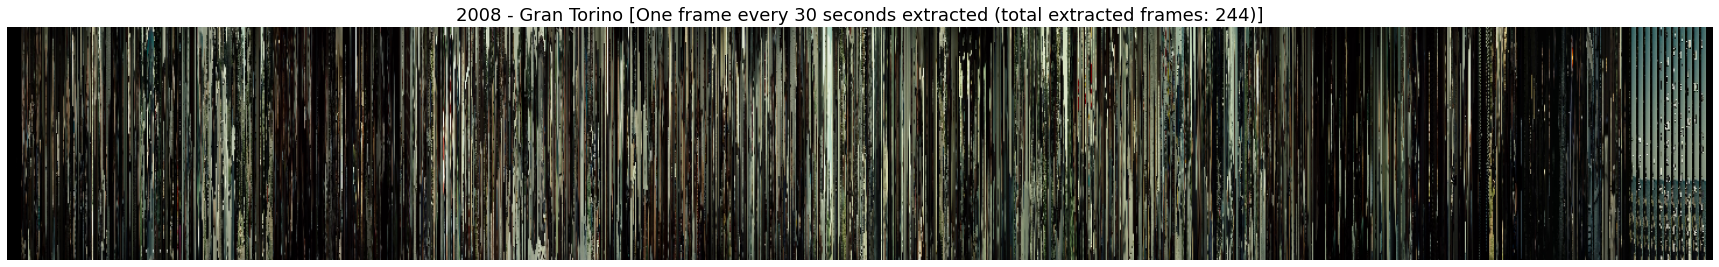

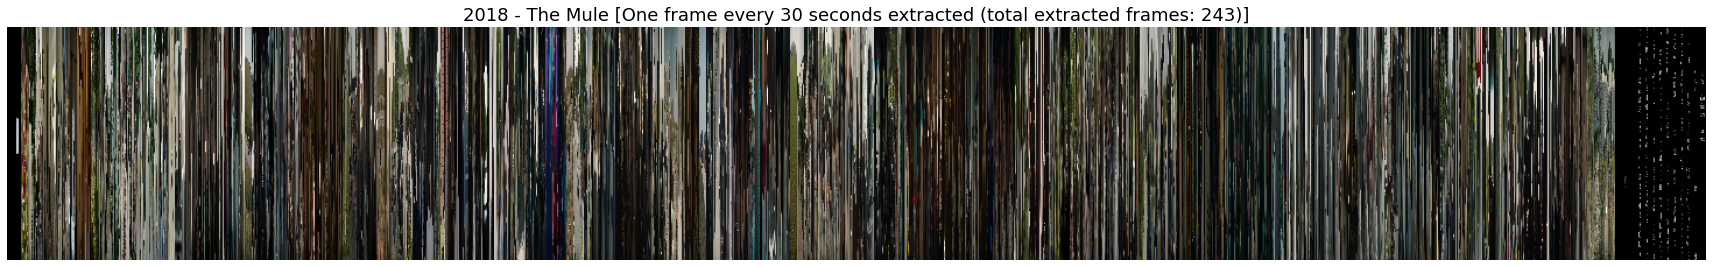

In [22]:
WIDTH_FRACTION = 200

for i, vid in enumerate(vid_name_list):
    img_list = []
    
    for img_path in images_path[vid]:
    
        img_read = plt.imread(img_path)
        img_resize = cv2.resize(img_read, 
                                dsize = (int(img_read.shape[1]/WIDTH_FRACTION), 200),
                                interpolation = cv2.INTER_CUBIC)
        img_list.append(img_resize) 

    img_hconcat = cv2.hconcat(img_list)

    plt.figure(figsize = (240, 30))
    plt.subplot(len(vid_name_list), 1, i + 1)
    plt.title(str(vid) + ' [One frame every '+ str(Nsec) + ' seconds extracted (total extracted frames: '+ str(len(images_path[vid])) + ')]', 
              fontsize = 18)
    plt.imshow(img_hconcat)
    plt.axis("off")

# References

- <a href = "https://stackoverflow.com/questions/33311153/python-extracting-and-saving-video-frames"> Python - Extracting and Saving Video Frames (at stackoverflow.com) </a>
- <a href = "https://www.geeksforgeeks.org/concatenate-images-using-opencv-in-python/"> Concatenate images using OpenCV in Python (at geeksforgeeks.org) </a>